<h2>Project (LaLiga) for Statistical Learning course.</h2>

Think of yourself, currently working as a Business analyst in one of the top sports company. The senior management team 
has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football 
tournament).
The data set contains information on all the teams so far participated in all the past tournaments. It has data about 
how many goals each team scored, conceded, how many times they came within first 6 positions, how many seasons they 
have qualified, their best position in the past etc.
<ul>
<li>Read the data set and replace dashes with 0 to make sure you can perform arithmetic operations on the data. (2.5 points)</li>
<li>Print all the teams which have started playing between 1930-1980. (5 points)</li>
<li>Print the list of teams which came Top 5 in terms of points (2.5 points)</li>
<li>Write a function with name “Goal_diff_count” which should return all the teams with their Goal Differences. Using the same function, find the team which has maximum and minimum goal difference. (5 points)</li>
    Goal_diff_count = GoalsFor - GoalsAgainst
<li>Create a new column with name “Winning Percent” and append it to the data set (5 points)</li>
    Percentage of Winning = (GamesWon / GamesPlayed)*100
    If there are any numerical error, replace it with 0%
<li>Print the top 5 teams which has the highest Winning percentage</li>
    Group teams based on their “Best position” and print the sum of their points for all positions (5 points)
        Eg: Best Position                Points

            1                              25000

            2                              7000  
</ul>

<h4><b>Q1 Read the data set and replace dashes with 0 to make sure you can perform arithmetic operations on the data. (2.5 points)</b></h4>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
laliga = pd.read_csv('Laliga.csv',skip_blank_lines = True)
## replace dashes with 0 
laliga.replace('-',0, inplace = True)
laliga

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934-35,2001-02,1
6,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,0,0,4,5,2,5,16,1929,1994-95,3
7,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,19,1929,2010-11,1
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,0,1,4,5,4,4,18,1939-40,2012-13,2
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,0,2,3,4,4,14,1932-33,2015-16,1


In [5]:
laliga['Points']=laliga[['Points']].apply(pd.to_numeric)
laliga['GamesPlayed']=laliga[['GamesPlayed']].apply(pd.to_numeric)
laliga['GamesWon']=laliga[['GamesWon']].apply(pd.to_numeric)
laliga['GamesDrawn']=laliga[['GamesDrawn']].apply(pd.to_numeric)
laliga['GamesLost']=laliga[['GamesLost']].apply(pd.to_numeric)
laliga['GoalsFor']=laliga[['GoalsFor']].apply(pd.to_numeric)
laliga['GoalsAgainst']=laliga[['GoalsAgainst']].apply(pd.to_numeric)
laliga['Champion']=laliga[['Champion']].apply(pd.to_numeric)
laliga['Runner-up']=laliga[['Runner-up']].apply(pd.to_numeric)
laliga['Third']=laliga[['Third']].apply(pd.to_numeric)
laliga['Fourth']=laliga[['Fourth']].apply(pd.to_numeric)
laliga['Fifth']=laliga[['Fifth']].apply(pd.to_numeric)
laliga['Sixth']=laliga[['Sixth']].apply(pd.to_numeric)
laliga['T']=laliga[['T']].apply(pd.to_numeric)

laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 20 columns):
Pos              61 non-null int64
Team             61 non-null object
Seasons          61 non-null int64
Points           61 non-null int64
GamesPlayed      61 non-null int64
GamesWon         61 non-null int64
GamesDrawn       61 non-null int64
GamesLost        61 non-null int64
GoalsFor         61 non-null int64
GoalsAgainst     61 non-null int64
Champion         61 non-null int64
Runner-up        61 non-null int64
Third            61 non-null int64
Fourth           61 non-null int64
Fifth            61 non-null int64
Sixth            61 non-null int64
T                61 non-null int64
Debut            61 non-null object
Since/LastApp    61 non-null object
BestPosition     61 non-null int64
dtypes: int64(17), object(3)
memory usage: 9.6+ KB


In [6]:
# Trying few Airthmetic operations on data

for col in laliga.columns:
    print ('Simple Statistics of Column:-', col)
    print(laliga[col].describe())
        
print('\n\n Simple statistics of dataframe\n',laliga.describe())    


Simple Statistics of Column:- Pos
count    61.000000
mean     31.000000
std      17.752934
min       1.000000
25%      16.000000
50%      31.000000
75%      46.000000
max      61.000000
Name: Pos, dtype: float64
Simple Statistics of Column:- Team
count         61
unique        61
top       Oviedo
freq           1
Name: Team, dtype: object
Simple Statistics of Column:- Seasons
count    61.000000
mean     24.000000
std      26.827225
min       1.000000
25%       4.000000
50%      12.000000
75%      38.000000
max      86.000000
Name: Seasons, dtype: float64
Simple Statistics of Column:- Points
count      61.000000
mean      901.426230
std      1134.899121
min         0.000000
25%        96.000000
50%       375.000000
75%      1351.000000
max      4385.000000
Name: Points, dtype: float64
Simple Statistics of Column:- GamesPlayed
count      61.000000
mean      796.819672
std       876.282765
min         0.000000
25%       114.000000
50%       423.000000
75%      1318.000000
max      2762.00

In [7]:
# Correlation - Compute pairwise correlation of columns
print(laliga.corr('pearson'))
print(laliga.corr('kendall'))
print(laliga.corr('spearman'))


                   Pos   Seasons    Points  GamesPlayed  GamesWon  GamesDrawn  \
Pos           1.000000 -0.889986 -0.856819    -0.902584 -0.829783   -0.913906   
Seasons      -0.889986  1.000000  0.981441     0.998677  0.971954    0.989387   
Points       -0.856819  0.981441  1.000000     0.979824  0.997240    0.958452   
GamesPlayed  -0.902584  0.998677  0.979824     1.000000  0.967641    0.994053   
GamesWon     -0.829783  0.971954  0.997240     0.967641  1.000000    0.939844   
GamesDrawn   -0.913906  0.989387  0.958452     0.994053  0.939844    1.000000   
GamesLost    -0.911761  0.949863  0.880040     0.956503  0.852785    0.973156   
GoalsFor     -0.829966  0.975059  0.996656     0.970127  0.999318    0.942668   
GoalsAgainst -0.912398  0.987828  0.944263     0.990129  0.926234    0.992579   
Champion     -0.424929  0.589072  0.714280     0.574716  0.752204    0.503472   
Runner-up    -0.481388  0.645876  0.764278     0.632921  0.797350    0.566269   
Third        -0.613165  0.80

In [8]:
## Compute pairwise correlation between rows or columns of DataFrame with rows or columns of Series or DataFrame.
laliga.std(axis=0, skipna=None, level=None, ddof=1, numeric_only=None)
    

Pos               17.752934
Seasons           26.827225
Points          1134.899121
GamesPlayed      876.282765
GamesWon         406.991030
GamesDrawn       201.799477
GamesLost        294.708594
GoalsFor        1506.740211
GoalsAgainst    1163.710766
Champion           5.472535
Runner-up          4.540107
Third              3.247445
Fourth             2.746980
Fifth              2.505840
Sixth              2.231420
T                 18.100282
BestPosition       5.276663
dtype: float64

<h4><b>Q2 Print  the teams which have started playing between 1930-1980. (5 points)</b></h4>

In [9]:
laliga_new = laliga.copy()
laliga_new['Debut_Start_Range'] = laliga_new['Debut'].astype(str).str[:4].astype(int)
print('Pos\t','Team\t\t\t','Debut')   
counter = 0
for index in laliga_new.index:
    value = laliga_new.loc[index,'Debut_Start_Range']
    if value >= 1930 and value <= 1980:
        print(laliga_new.loc[index,'Pos'],'\t',laliga_new.loc[index,'Team'], '\t\t',laliga_new.loc[index,'Debut'])
        counter = counter + 1
print('Total number of teams which have started playing between 1930-1980:- ', counter)

Pos	 Team			 Debut
4 	 Valencia 		 1931-32
6 	 Sevilla 		 1934-35
9 	 Zaragoza 		 1939-40
10 	 Real Betis 		 1932-33
11 	 Deportivo La Coruna 		 1941-42
12 	 Celta Vigo 		 1939-40
13 	 Valladolid 		 1948-49
15 	 Sporting Gijon 		 1944-45
16 	 Osasuna 		 1935-36
17 	 Malaga 		 1949-50
18 	 Oviedo 		 1933-34
19 	 Mallorca 		 1960-61
20 	 Las Palmas 		 1951-52
22 	 Granada 		 1941-42
23 	 Rayo Vallecano 		 1977-78
24 	 Elche 		 1959-60
26 	 Hercules 		 1935-36
27 	 Tenerife 		 1961-62
28 	 Murcia 		 1940-41
29 	 Alaves 		 1930-31
30 	 Levante 		 1963-64
31 	 Salamanca 		 1974-75
32 	 Sabadell 		 1943-44
33 	 Cadiz 		 1977-78
35 	 Castellon 		 1941-42
38 	 Cordoba 		 1962-63
40 	 Recreativo 		 1978-79
41 	 Burgos CF 		 1971-72
42 	 Pontevedra 		 1963-64
47 	 Gimnastic 		 1947-48
50 	 Alcoyano 		 1945-46
51 	 Jaen 		 1953-54
53 	 AD Almeria 		 1979-80
55 	 Lleida 		 1950-51
58 	 Condal 		 1956-57
59 	 Atletico Tetuan 		 1951-52
60 	 Cultural Leonesa 		 1955-56
Total number of teams which ha

In [10]:
## Another way fo doing above question
laliga_new = laliga_new[laliga_new['Debut_Start_Range'].between(1930, 1980)]
print('Total number of teams which have started playing between 1930-1980:- ',laliga_new['Team'].count())
laliga_new[['Pos','Team','Debut']]

Total number of teams which have started playing between 1930-1980:-  37


,Pos,Team,Debut
3,4,Valencia,1931-32
5,6,Sevilla,1934-35
8,9,Zaragoza,1939-40
9,10,Real Betis,1932-33
10,11,Deportivo La Coruna,1941-42
11,12,Celta Vigo,1939-40
12,13,Valladolid,1948-49
14,15,Sporting Gijon,1944-45
15,16,Osasuna,1935-36
16,17,Malaga,1949-50


<h4>Q3 Print the list of teams which came Top 5 in terms of points (2.5 points)</h4>

In [11]:
def finding_top5(data_frame,n):
    laliga_top5 = data_frame.copy()
    laliga_top5[['Points']] = laliga_top5[['Points']].apply(pd.to_numeric)
    laliga_top5.sort_values('Points', ascending=False, na_position='last')
    return laliga_top5[['Pos','Team','Points']].head(n)

In [12]:
print("Following is the list of teams which are in Top 5 in terms of points")
finding_top5(laliga,5)

Following is the list of teams which are in Top 5 in terms of points


,Pos,Team,Points
0,1,Real Madrid,4385
1,2,Barcelona,4262
2,3,Atletico Madrid,3442
3,4,Valencia,3386
4,5,Athletic Bilbao,3368


<h4> Q4 Write a function with name “Goal_diff_count” which should return all the teams with their Goal Differences. 
Using the same function, find the team which has maximum and minimum goal difference. (5 points)</h4>
Goal_diff_count = GoalsFor - GoalsAgainst

In [13]:
def Goal_diff_count(data_frame):
    df = data_frame.copy()
    df[['Try1']] = df[['GoalsFor']].apply(pd.to_numeric) 
    df[['Try2']]= df[['GoalsAgainst']].apply(pd.to_numeric)
    df['Goal_diff_count'] = (df['Try1'] - df['Try2']).abs()
    print('\n')
    print(df['Team'].loc[df['Goal_diff_count'].idxmax()],
          " is the team which has maximum goal difference - ",df['Goal_diff_count'].max())
    print('\n')
    print(df['Team'].loc[df['Goal_diff_count'].idxmin()],
          "is the team which has maximum goal difference - ",df['Goal_diff_count'].min())
    return df[['Pos','Team','Goal_diff_count']]

Goal_diff_count(laliga)



Real Madrid  is the team which has maximum goal difference -  2807


Girona is the team which has maximum goal difference -  0


,Pos,Team,Goal_diff_count
0,1,Real Madrid,2807
1,2,Barcelona,2786
2,3,Atletico Madrid,1225
3,4,Valencia,929
4,5,Athletic Bilbao,931
5,6,Sevilla,307
6,7,Espanyol,280
7,8,Real Sociedad,2
8,9,Zaragoza,164
9,10,Real Betis,333


<h4> Q5 
<br>Create a new column with name “Winning Percent” and append it to the data set (5 points)
<br>Percentage of Winning = (GamesWon / GamesPlayed)*100
<br>If there are any numerical error, replace it with 0%
<br>Print the top 5 teams which has the highest Winning percentage</h4>

In [14]:
laliga['GamesWon'] = laliga[['GamesWon']].apply(pd.to_numeric)
laliga['GamesPlayed'] = laliga[['GamesPlayed']].apply(pd.to_numeric)

laliga['Winning Percent'] = (laliga['GamesWon']/laliga['GamesPlayed'])*100
laliga['Winning Percent']=laliga['Winning Percent'].fillna(0)
laliga[['Pos','Team','Winning Percent']].sort_values(by = 'Winning Percent', ascending = False).head(5)

,Pos,Team,Winning Percent
0,1,Real Madrid,59.630702
1,2,Barcelona,57.241130
2,3,Atletico Madrid,47.475134
3,4,Valencia,44.557057
4,5,Athletic Bilbao,43.772629


<h4>Q6 Group teams based on their “Best position” and print the sum of their points for all positions (5 points)

Eg: Best Position                Points
        <br>
        1</t>                              25000
        <br>
        2                              7000
</h4>

In [120]:
laliga_q6 = laliga.copy()
laliga_q6['Points'] = laliga_q6[['Points']].apply(pd.to_numeric)

laliga_q6.groupby(['BestPosition'])[['Points']].sum()


,Points
BestPosition,
1,27933
2,6904
3,5221
4,6563
5,1884
6,2113
7,1186
8,1134
9,96


In [81]:
## Some Extra Practice

In [17]:
df = laliga.copy()
df[['Try1']] = df[['GoalsFor']].apply(pd.to_numeric) 
df[['Try2']]= df[['GoalsAgainst']].apply(pd.to_numeric)
laliga['Goal_diff_count'] = (df['Try1'] - df['Try2']).abs()
laliga.sort_values(by=['Seasons','Points','Goal_diff_count'], ascending = False).reset_index().drop('index',axis=1)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,Winning Percent,Goal_diff_count
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,8,8,3,4,79,1929,1929,1,59.630702,2807
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,12,12,4,6,83,1929,1929,1,57.241130,2786
2,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,10,5,8,10,49,1929,1929,1,43.772629,931
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,10,11,10,7,50,1931-32,1987-88,1,44.557057,929
4,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,...,4,5,2,5,16,1929,1994-95,3,36.100533,280
5,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,16,9,7,6,56,1929,2002-03,1,47.475134,1225
6,6,Sevilla,73,2819,2408,990,531,887,3680,3373,...,4,5,12,6,32,1934-35,2001-02,1,41.112957,307
7,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,...,2,5,4,3,19,1929,2010-11,1,37.532580,2
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,...,4,5,4,4,18,1939-40,2012-13,2,35.146022,164
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,...,2,3,4,4,14,1932-33,2015-16,1,35.069444,333


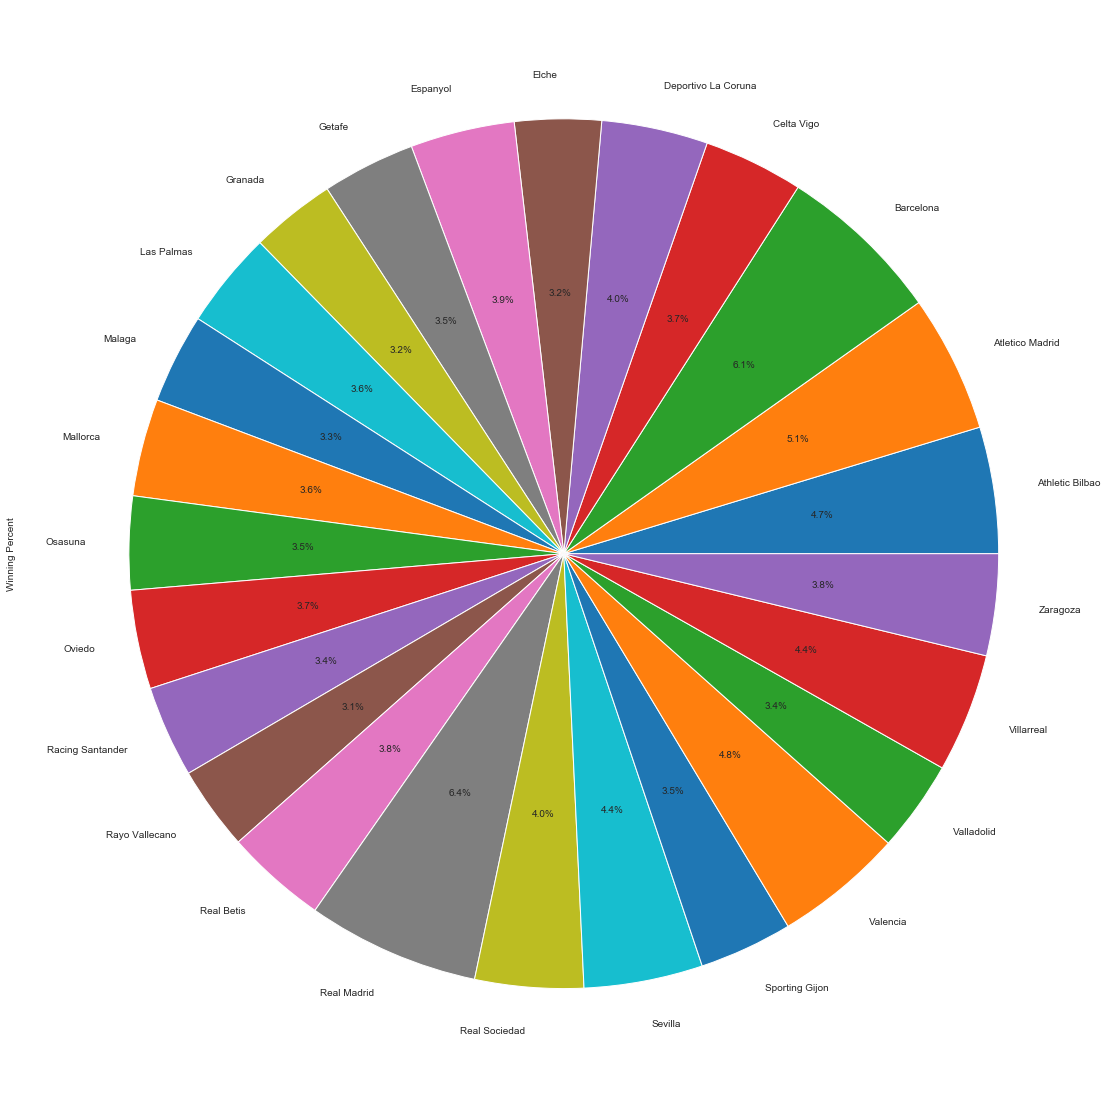

In [18]:
#TOP 25 - Plotting pie chart for game won by top 25 teams
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from subprocess import check_output
#df.Team.value_counts().reset_index()
df_new = df.head(25)
df_new.groupby(['Team'])['Winning Percent'].sum().plot(kind='pie', autopct='%2.1f%%', figsize=(20,20))

Text(0, 0.5, 'Games Won')

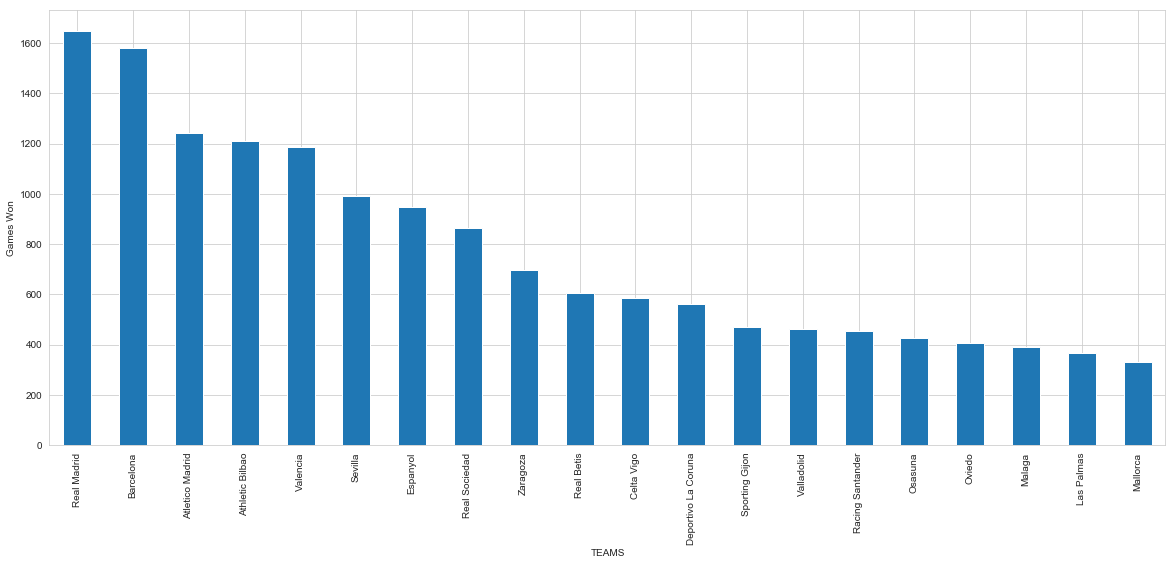

In [19]:
# Bar graphs showing the results with game won vs game played.
bar_graph=df_new.groupby(['Team'])['GamesWon'].sum().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(20,8))

bar_graph.set_xlabel("TEAMS")
bar_graph.set_ylabel("Games Won")



Text(0, 0.5, 'GamesP')

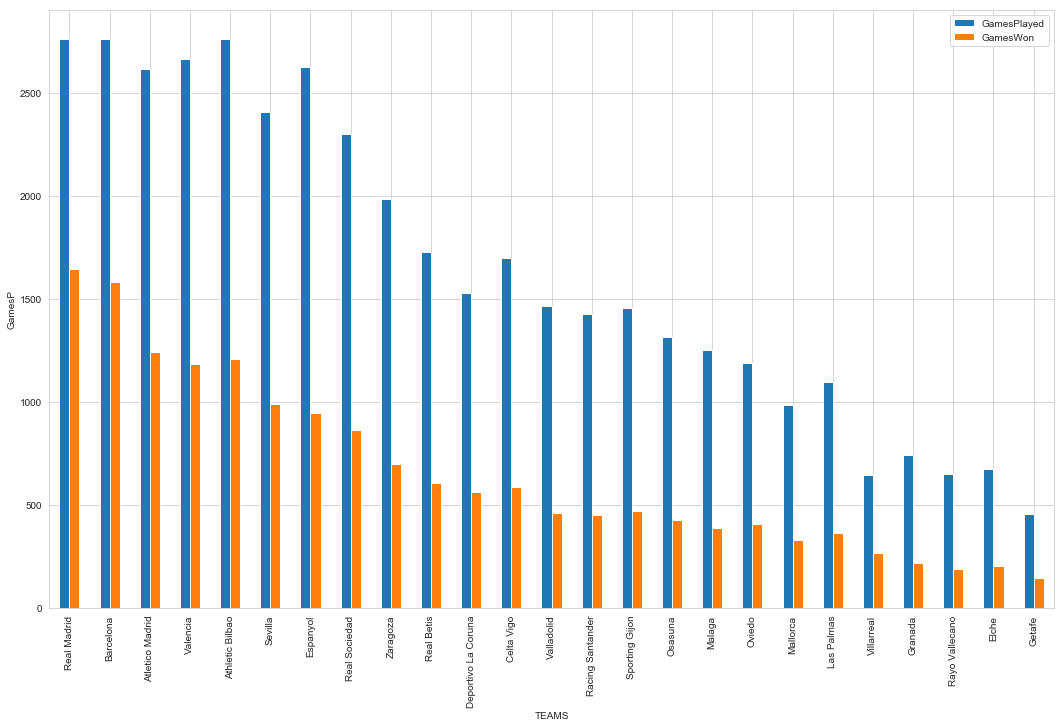

In [20]:
bar_graph1 = df_new.plot(x='Team',y=['GamesPlayed','GamesWon'], kind="bar",figsize=(18,11))
bar_graph1.set_xlabel("TEAMS")
bar_graph1.set_ylabel("GamesP")

C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


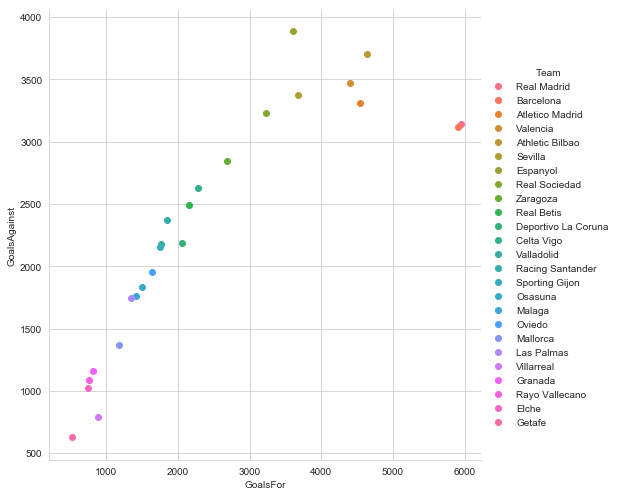

In [21]:
sns.FacetGrid(df_new, hue="Team", size=7).map(plt.scatter, "GoalsFor", "GoalsAgainst").add_legend()

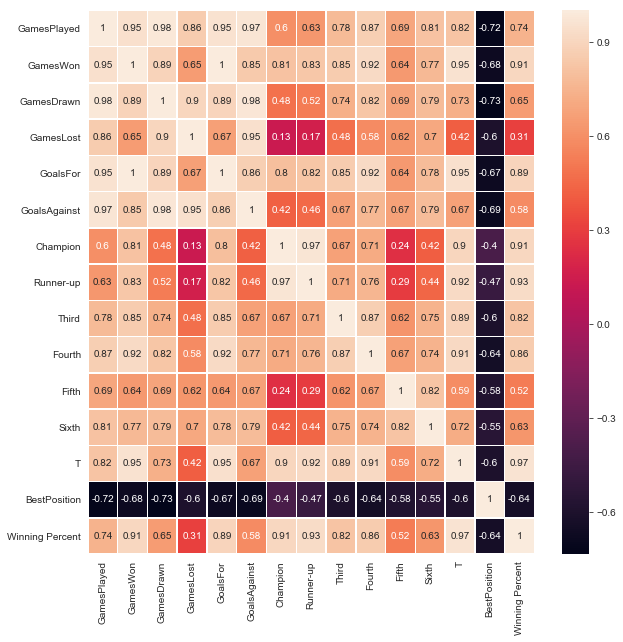

In [22]:
df = df.drop(columns = ['Try1','Try2'])
corr2 = df_new.select_dtypes(include =['float64','int64']).\
loc[:,df.select_dtypes(include =['float64','int64']).columns[3:]].corr()
fig2,ax2 = plt.subplots(nrows = 1,ncols = 1)
fig2.set_size_inches(w=10,h=10)
sns.heatmap(corr2,annot = True,linewidths=0.5,ax = ax2)

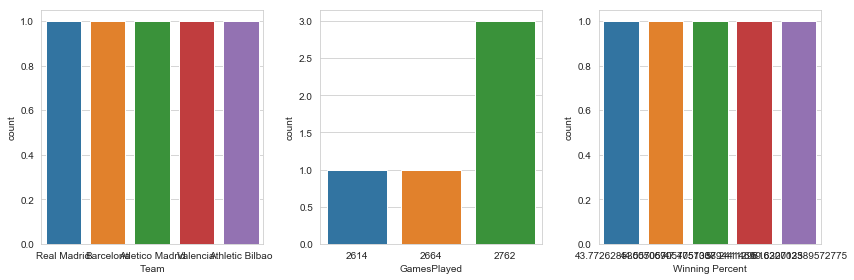

In [23]:
df = df.head(5)
fig3, ax3 = plt.subplots(nrows = 1, ncols = 3)
fig3.set_size_inches(12,4)
sns.countplot(x = df['Team'],ax = ax3[0])
sns.countplot(x = df['GamesPlayed'],ax = ax3[1])
sns.countplot(x = df['Winning Percent'],ax = ax3[2])
fig3.tight_layout()

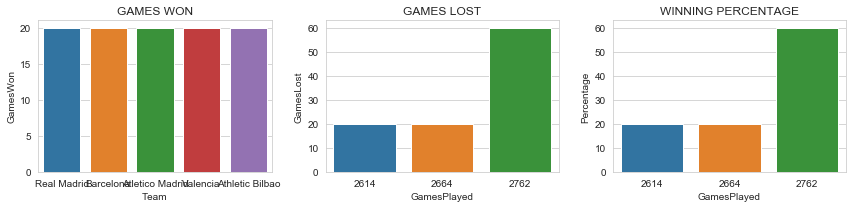

In [24]:
df=df.head(5)
fig4, ax4 = plt.subplots(nrows = 1, ncols = 3)
fig4.set_size_inches(12,3)
sns.barplot(x ='Team', y = 'Team', data = df,\
            estimator = lambda x: len(x)/len(df) * 100, ax = ax4[0],\
           orient = 'v')
ax4[0].set(ylabel = 'GamesWon',title = 'GAMES WON')
sns.barplot(x ='GamesPlayed', y = 'GamesWon', data = df,\
            estimator = lambda x: len(x)/len(df) * 100, ax = ax4[1],\
           orient = 'v')
ax4[1].set(ylabel = 'GamesLost',title = 'GAMES LOST')
sns.barplot(x ='GamesPlayed', y = 'GamesLost', data = df,\
            estimator = lambda x: len(x)/len(df) * 100, ax = ax4[2],\
           orient = 'v')
ax4[2].set(ylabel = 'Percentage',title = 'WINNING PERCENTAGE')
fig4.tight_layout()


IndexError: index 3 is out of bounds for axis 0 with size 3

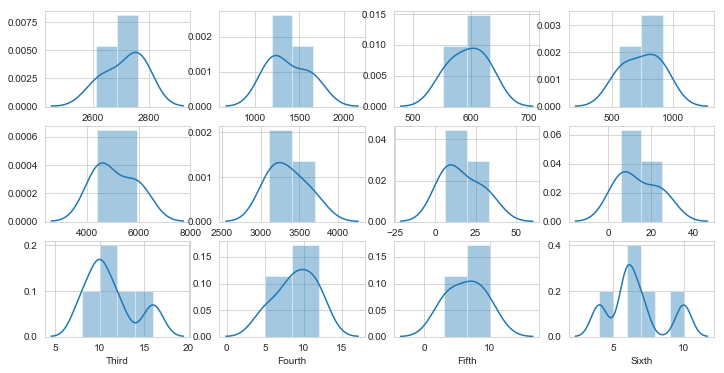

In [25]:
fig9, ax9 = plt.subplots(nrows=3,ncols=4)
fig9.set_size_inches(12,6)
for i,j in enumerate(df.select_dtypes(include = ['int64','float64']).columns[3:].tolist()):
    sns.distplot(df.loc[:,j],kde =True,hist = True, ax = ax9[int(i/4)][i%4])
fig9.tight_layout()

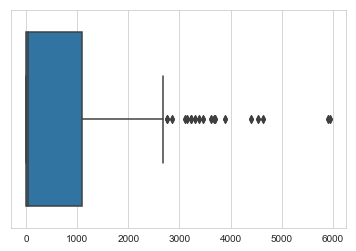

In [88]:
sns.boxplot(df_new.select_dtypes(include = ['int64','float64']).iloc[:,3:], orient = 'h')

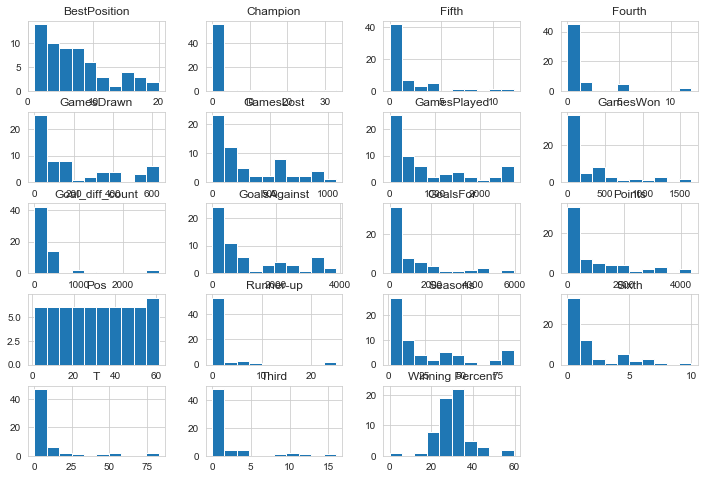

In [90]:
data = laliga.copy()
data.hist(figsize=(12,8))
plt.show()

In [92]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

laliga = pd.read_csv('Laliga.csv',skip_blank_lines = True)
## replace dashes with 0 
laliga.replace('-',0, inplace = True)
laliga
df = laliga.copy()
df.head(10)


df['GamesWon'] = df[['GamesWon']].apply(pd.to_numeric)
df['GamesPlayed'] = df[['GamesPlayed']].apply(pd.to_numeric)
df['GamesLost'] = df[['GamesLost']].apply(pd.to_numeric)
df['GamesDrawn'] = df[['GamesDrawn']].apply(pd.to_numeric)
df['GoalsFor'] = df[['GoalsFor']].apply(pd.to_numeric)
df['GoalsAgainst'] = df[['GoalsAgainst']].apply(pd.to_numeric)



df['Winning Percent'] = (df['GamesWon']/df['GamesPlayed'])*100
df['Winning Percent']=df['Winning Percent'].fillna(0)

#Find the names of all the columns/attributes
full_y = df['GamesPlayed']
attributes = df.columns
attributes = attributes.drop('GamesPlayed')
attributes


full_x = df[attributes]
x_train = full_x[0:30]
x_train = x_train.drop('Team', axis = 1)
x_train = x_train.drop('Debut', axis = 1)
x_train = x_train.drop('Since/LastApp', axis = 1)
x_test = full_x[31:60]
x_test = x_test.drop('Team', axis = 1)
x_test = x_test.drop('Debut', axis = 1)
x_test = x_test.drop('Since/LastApp', axis = 1)

y_train = full_y[0:30]
y_test = full_y[31:60]

forest_clf = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 1)
forest_clf.fit(x_train, y_train)
y_pred = forest_clf.predict(x_test)
print("ACCURACY_FOREST_CLIFF:")
print(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))

counter = np.arange(1,30,1)
for k in counter:
    NNH = KNeighborsClassifier(n_neighbors = k , weights = 'uniform', metric = 'euclidean')
    NNH.fit(x_train, y_train)
    y_pred = NNH.predict(x_test)
    print(accuracy_score(y_test, y_pred))




ACCURACY_FOREST_CLIFF:
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
